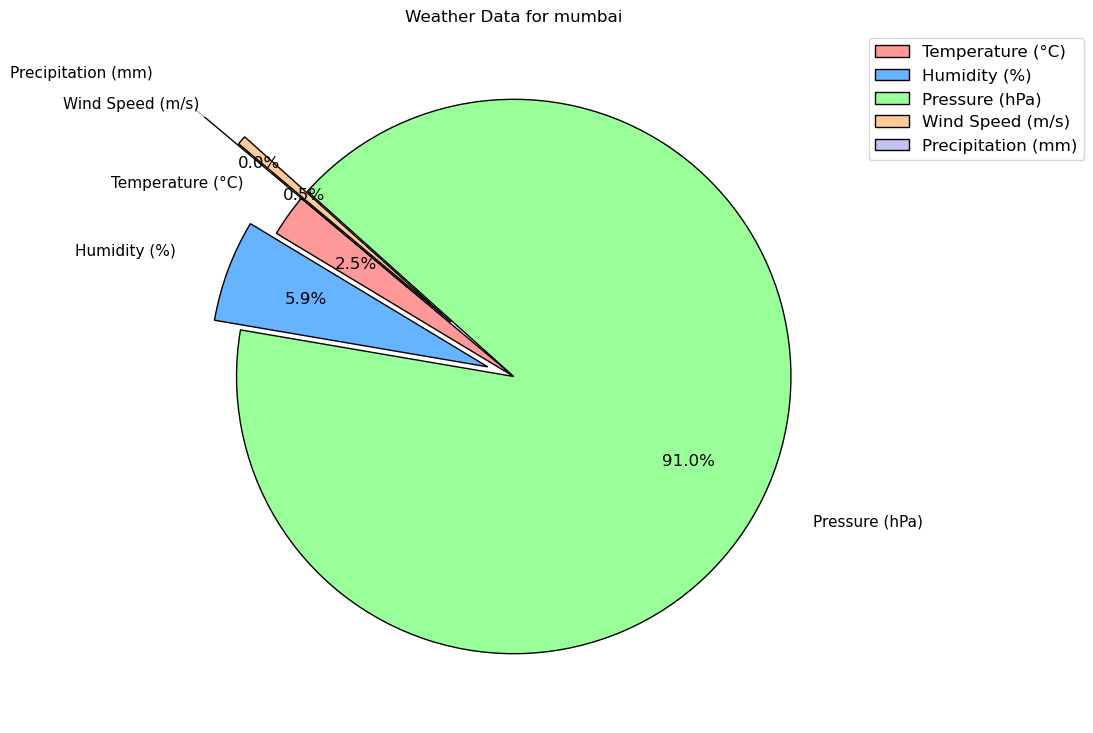

In [8]:
import requests
import matplotlib.pyplot as plt

# Function to fetch weather data dynamically
def get_weather_data(city):
    api_key = "a49142b21e4ce14f607740acec645169"  # Replace with your OpenWeatherMap API key
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error fetching data. Please check the city name or API key.")
        return None

# User input for city name
city = input("Enter the city name: ")

# Fetch weather data
weather_data = get_weather_data(city)

# If data is retrieved successfully, process and visualize it
if weather_data:
    temperature = weather_data["main"]["temp"]
    humidity = weather_data["main"]["humidity"]
    pressure = weather_data["main"]["pressure"]
    wind_speed = weather_data["wind"]["speed"]
    
    # Extract precipitation if available (Rain or Snow)
    precipitation = 0  # Default to 0 if no rain/snow
    if "rain" in weather_data:
        precipitation = weather_data["rain"].get("1h", 0)  # Rainfall in last 1 hour (mm)
    elif "snow" in weather_data:
        precipitation = weather_data["snow"].get("1h", 0)  # Snowfall in last 1 hour (mm)

    # Data for visualization
    labels = ["Temperature (°C)", "Humidity (%)", "Pressure (hPa)", "Wind Speed (m/s)", "Precipitation (mm)"]
    values = [temperature, humidity, pressure, wind_speed, precipitation]
    colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"]  # Colors for each segment
    
    #Adjust explode: highlight small values
    explode = [0, 0.1, 0, 0.3, 0.5]
    
    # Plotting the pie chart
    plt.figure(figsize=(9, 9))
    wedges, texts, autotexts = plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140,
    explode=explode, pctdistance=0.7, labeldistance=1.2, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
    for text in texts:
        text.set_fontsize(11)
        text.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.7))  # Background box for labels
    plt.title(f"Weather Data for {city}")
    plt.legend(wedges, labels, loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)  # Moves legend outside
    plt.show()

